In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
all_df=pd.read_csv('Concrete_Data.csv', index_col=False)
all_df.head()

,ID,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1000,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1001,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,1002,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,1003,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,1004,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
all_df.drop('ID', axis=1, inplace=True)
all_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print(all_df)

      cement   blast_furnace_slag  fly_ash  water  superplasticizer  \
0       540.0                 0.0      0.0  162.0               2.5   
1       540.0                 0.0      0.0  162.0               2.5   
2       332.5               142.5      0.0  228.0               0.0   
3       332.5               142.5      0.0  228.0               0.0   
4       198.6               132.4      0.0  192.0               0.0   
...       ...                 ...      ...    ...               ...   
1025    276.4               116.0     90.3  179.6               8.9   
1026    322.2                 0.0    115.6  196.0              10.4   
1027    148.5               139.4    108.6  192.7               6.1   
1028    159.1               186.7      0.0  175.6              11.3   
1029    260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate   fine_aggregate  age  concrete_compressive_strength  
0                1040.0           676.0   28                         

In [5]:
X = all_df.drop('concrete_compressive_strength', axis=1)

<Axes: >

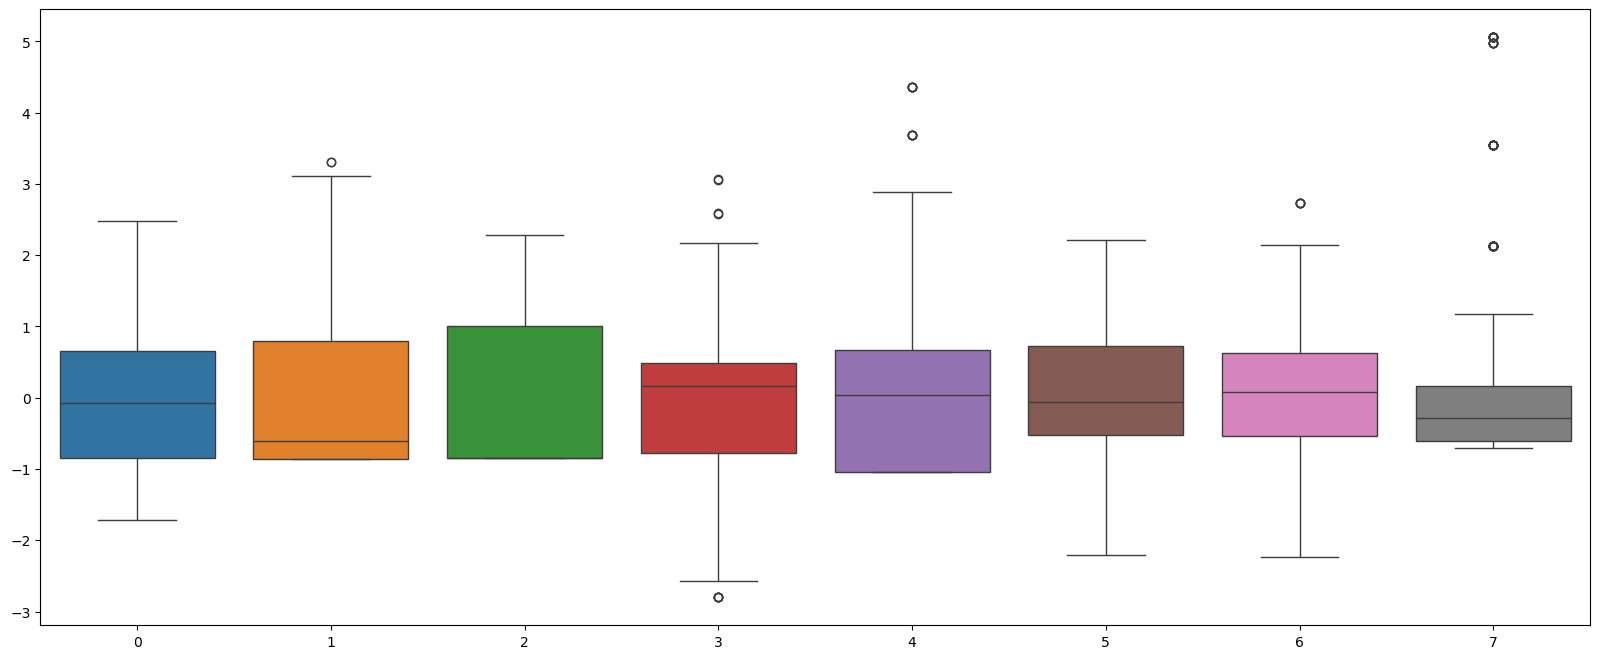

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 

In [7]:
# assign numerical label to y
y = all_df['concrete_compressive_strength']

In [8]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=1)

In [9]:
# Creating the Linear Regression Model Object and training it on the train data
linearmodel = linear_model.LinearRegression()
linearmodel.fit(Xs_train, y_train)

#Using the model to predict compressive strength
linearprediction = linearmodel.predict(Xs_test)
#print(linearprediction)

Text(0.5, 1.0, 'Actual vs Predicted Compressive Strength')

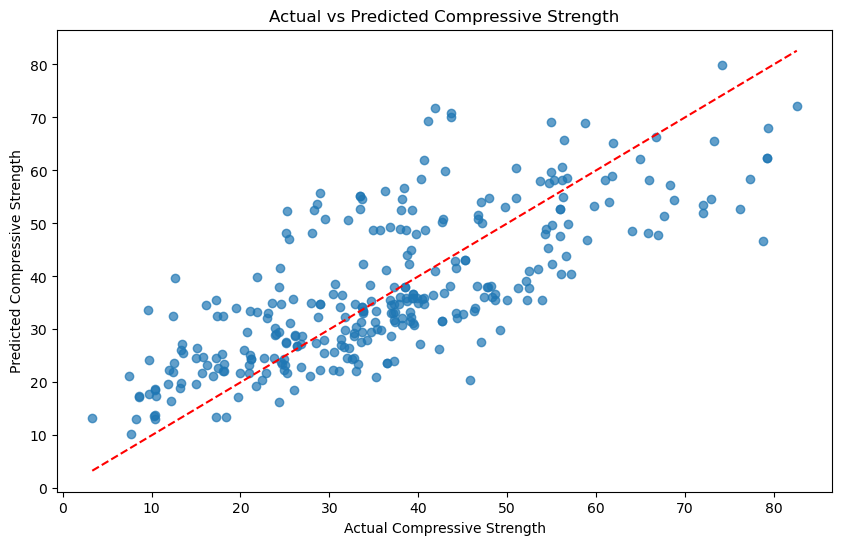

In [10]:
#Plotting the results on a graph in comparison to the test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linearprediction, alpha=0.7, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs Predicted Compressive Strength")

In [11]:
# Mean Squared Error
mse = mean_squared_error(y_test, linearprediction)
print("Mean Squared Error for Linear Regression Model:", mse)

Mean Squared Error for Linear Regression Model: 120.181255575368
